In [1]:
import pandas as pd

In [2]:
dep = ["AcuteMedicine", "Cardiology", "Gastroenterology", "Neurology", "Obstetrics", "Oncology", "Respiratory"]

In [3]:
dft = pd.read_csv("C:/Users/Louis/OneDrive/Documents/Oxford/Maths/Dissertation/train.csv")
dfv = pd.read_csv("C:/Users/Louis/OneDrive/Documents/Oxford/Maths/Dissertation/valid.csv")

In [4]:
dft["triage-category"].value_counts()

Cardiology          4981
Obstetrics          1788
Respiratory         1219
Neurology            744
Gastroenterology     417
AcuteMedicine        213
Oncology             197
Name: triage-category, dtype: int64

In [5]:
dft.groupby('triage-category').apply(lambda x: x.sample(2, replace=False, random_state=2)).reset_index(drop=True)

,text,label,triage-category
0,: : : Sex: M Service: MEDICINE Allergies: Iodi...,5849,AcuteMedicine
1,: : : Sex: F Service: MEDICINE Allergies: Pati...,5849,AcuteMedicine
2,: : Service: MEDICINE Allergies: Patient recor...,41011,Cardiology
3,: : : Sex: M Service: CARDIOTHORACIC Allergies...,41401,Cardiology
4,: : Service: SURGERY Allergies: Nsaids / Aspir...,5789,Gastroenterology
5,: : : Sex: F Service: MEDICINE Allergies: Pati...,5789,Gastroenterology
6,: : : Sex: M Service: NSU HISTORY OF PRESENT I...,430,Neurology
7,: : : Sex: F Service: NSU HISTORY OF PRESENT I...,430,Neurology
8,: : : Sex: M Service: ADMISSION DIAGNOSIS: . N...,V3001,Obstetrics
9,: : : Sex: M Service: NB HISTORY OF PRESENT IL...,V3000,Obstetrics


In [6]:
dfv["triage-category"].value_counts()

Cardiology          1571
Obstetrics           635
Respiratory          388
Neurology            231
Gastroenterology     148
Oncology              75
AcuteMedicine         66
Name: triage-category, dtype: int64

In [7]:
dft.loc[dft['triage-category'] == "Cardiology"][:10]

,text,label,triage-category
0,: : : Sex: F Service: CARDIOTHORACIC Allergies...,4240,Cardiology
2,: : : Sex: M Service: CARDIOTHORACIC Allergies...,41041,Cardiology
4,: : : Sex: M Service: ADMISSION DIAGNOSIS: . S...,41401,Cardiology
6,: : : Sex: M Service: HISTORY OF PRESENT ILLNE...,41401,Cardiology
7,: : Service: CSU HISTORY OF PRESENT ILLNESS: T...,41401,Cardiology
8,: : : Sex: F Service: CARDIAC SURGERY CHIEF CO...,41401,Cardiology
9,: : : Sex: M Service: MEDICINE Allergies: Aspi...,4280,Cardiology
10,: : : Sex: F Service: CARDIOTHORACIC Allergies...,41401,Cardiology
12,: : : Sex: M Service: CARDIOTHORACIC Allergies...,41041,Cardiology
14,: : Service: MICU CHIEF COMPLAINT: Lightheaded...,4280,Cardiology


In [8]:
import copy
from datasets import DatasetDict, Dataset

c:\Users\Louis\anaconda3\envs\contest2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
data = {}

In [10]:
dfts = dft.groupby('triage-category').apply(lambda x: x.sample(197, replace=False, random_state=2)).reset_index(drop=True) #sample 197 from each class randomly without replacement

In [11]:
for d in dep:
    tst = copy.deepcopy(dfts)
    val = copy.deepcopy(dfv)
    def labelint(row):
        if row == d:
            return 0
        else:
            return 1
    
    tst["class"] = tst["triage-category"].apply(labelint)
    val["class"] = val["triage-category"].apply(labelint)
    x = tst.drop(columns=["label", "triage-category"]).rename(columns={"class": "label"})
    y = val.drop(columns=["label", "triage-category"]).rename(columns={"class": "label"})

    
    
    mimic = DatasetDict({
    "train" : Dataset.from_pandas(x).class_encode_column("label"), 
    "validation" : Dataset.from_pandas(y).class_encode_column("label") 
    })

    data[d] = mimic
    

Casting to class labels: 100%|██████████| 4/4 [00:00<00:00, 266.42ba/s]


In [12]:
data["Cardiology"]['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 1379
})

In [13]:
from transformers import AutoTokenizer

model_ckpt = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [14]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [15]:
enc = {}
for d in dep:
    enc[d] = data[d].map(tokenize, batched=True, batch_size=None)

100%|██████████| 1/1 [00:02<00:00,  2.28s/ba]


In [16]:
enc["AcuteMedicine"].column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask']}

In [17]:
enc["AcuteMedicine"]['train']['input_ids'][0]

[0,
 35,
 4832,
 4832,
 15516,
 35,
 256,
 1841,
 35,
 22718,
 2371,
 13974,
 404,
 11249,
 918,
 35,
 38,
 1630,
 833,
 12,
 100,
 1630,
 833,
 7555,
 8173,
 1589,
 44550,
 833,
 4832,
 1231,
 20722,
 12042,
 35,
 15671,
 261,
 415,
 5593,
 493,
 6,
 13827,
 39729,
 2988,
 6,
 8944,
 330,
 337,
 23249,
 5454,
 208,
 19625,
 50,
 9318,
 33745,
 40209,
 35,
 6979,
 1792,
 1258,
 20259,
 846,
 725,
 579,
 73,
 642,
 16415,
 2407,
 1178,
 13133,
 13,
 20971,
 29079,
 3888,
 7089,
 61,
 41281,
 7878,
 579,
 73,
 642,
 3087,
 3792,
 28050,
 13604,
 13,
 17092,
 154,
 314,
 1717,
 241,
 1334,
 337,
 7326,
 7298,
 9,
 17356,
 12285,
 1825,
 35,
 42191,
 16,
 10,
 25610,
 313,
 19,
 6336,
 375,
 1131,
 750,
 217,
 1533,
 127,
 523,
 4982,
 8,
 29051,
 3551,
 28837,
 20307,
 1135,
 5804,
 740,
 73,
 428,
 16698,
 30960,
 9,
 4381,
 4400,
 17129,
 579,
 73,
 642,
 28670,
 16415,
 2407,
 1178,
 4758,
 31995,
 13133,
 15,
 13,
 42173,
 29177,
 15160,
 179,
 1580,
 94,
 2641,
 19,
 37582,
 10100,
 

In [18]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
from transformers import AutoModelForSequenceClassification

num_labels = 7 #DONT YOU MEAN 2???????????
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [20]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [21]:
from transformers import Trainer, TrainingArguments


for d in dep:
    batch_size = 2 #Needs to be bigger?
    logging_steps = len(enc[d]["train"]) // batch_size
    #CHECK output_dir meaning, have I messed up?
    model_name = f"{model_ckpt}-{d}-197-batchsize{batch_size}"
    training_args = TrainingArguments(output_dir=model_name,
                                    num_train_epochs=2,
                                    learning_rate=2e-5,
                                    per_device_train_batch_size=batch_size,
                                    per_device_eval_batch_size=batch_size,
                                    weight_decay=0.01,
                                    evaluation_strategy="epoch",
                                    disable_tqdm=False,
                                    logging_steps=logging_steps,
                                    push_to_hub=False,
                                    log_level="error") #optim="adamw_torch"??  Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

    trainer = Trainer(model=model, args=training_args,
                    compute_metrics=compute_metrics,
                    train_dataset=enc[d]["train"],
                    eval_dataset=enc[d]["validation"],
                    tokenizer=tokenizer)
    trainer.train();

c:\Users\Louis\anaconda3\envs\contest2\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
 50%|█████     | 690/1380 [01:43<01:29,  7.68it/s]

{'loss': 0.6357, 'learning_rate': 1.0014492753623189e-05, 'epoch': 1.0}


                                                  
 50%|█████     | 691/1380 [02:41<3:21:39, 17.56s/it]

{'eval_loss': 0.14363586902618408, 'eval_accuracy': 0.9226075786769429, 'eval_f1': 0.94472333371539, 'eval_runtime': 58.1009, 'eval_samples_per_second': 53.596, 'eval_steps_per_second': 26.798, 'epoch': 1.0}


100%|█████████▉| 1379/1380 [04:23<00:00,  6.96it/s] 

{'loss': 0.3719, 'learning_rate': 2.8985507246376815e-08, 'epoch': 2.0}


                                                   
100%|██████████| 1380/1380 [05:20<00:00,  4.30it/s]
c:\Users\Louis\anaconda3\envs\contest2\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'eval_loss': 0.1531176120042801, 'eval_accuracy': 0.9656390494540783, 'eval_f1': 0.970658302159613, 'eval_runtime': 57.1001, 'eval_samples_per_second': 54.536, 'eval_steps_per_second': 27.268, 'epoch': 2.0}
{'train_runtime': 320.7004, 'train_samples_per_second': 8.6, 'train_steps_per_second': 4.303, 'train_loss': 0.5049267834511356, 'epoch': 2.0}


 50%|████▉     | 689/1380 [01:41<01:37,  7.06it/s]

{'loss': 0.3947, 'learning_rate': 1.0014492753623189e-05, 'epoch': 1.0}


                                                  
 50%|█████     | 691/1380 [02:39<2:34:34, 13.46s/it]

{'eval_loss': 0.6278432607650757, 'eval_accuracy': 0.9014129736673089, 'eval_f1': 0.9006519836244696, 'eval_runtime': 57.7715, 'eval_samples_per_second': 53.902, 'eval_steps_per_second': 26.951, 'epoch': 1.0}


100%|█████████▉| 1379/1380 [04:20<00:00,  7.02it/s] 

{'loss': 0.1285, 'learning_rate': 2.8985507246376815e-08, 'epoch': 2.0}


                                                   
100%|██████████| 1380/1380 [05:20<00:00,  4.31it/s]
c:\Users\Louis\anaconda3\envs\contest2\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'eval_loss': 0.42379048466682434, 'eval_accuracy': 0.9360950545921645, 'eval_f1': 0.9359497646246987, 'eval_runtime': 59.2285, 'eval_samples_per_second': 52.576, 'eval_steps_per_second': 26.288, 'epoch': 2.0}
{'train_runtime': 320.1391, 'train_samples_per_second': 8.615, 'train_steps_per_second': 4.311, 'train_loss': 0.2612327782421177, 'epoch': 2.0}


 50%|█████     | 690/1380 [01:40<01:30,  7.60it/s]

{'loss': 0.5429, 'learning_rate': 1.0014492753623189e-05, 'epoch': 1.0}


                                                  
 50%|█████     | 691/1380 [02:37<3:15:59, 17.07s/it]

{'eval_loss': 0.13693083822727203, 'eval_accuracy': 0.9698137443802184, 'eval_f1': 0.9701905496073568, 'eval_runtime': 56.4528, 'eval_samples_per_second': 55.161, 'eval_steps_per_second': 27.581, 'epoch': 1.0}


100%|█████████▉| 1379/1380 [04:17<00:00,  6.46it/s] 

{'loss': 0.3, 'learning_rate': 2.8985507246376815e-08, 'epoch': 2.0}


                                                   
100%|██████████| 1380/1380 [05:14<00:00,  4.38it/s]
c:\Users\Louis\anaconda3\envs\contest2\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'eval_loss': 0.15317554771900177, 'eval_accuracy': 0.9717405266538215, 'eval_f1': 0.9720069437194279, 'eval_runtime': 57.2557, 'eval_samples_per_second': 54.388, 'eval_steps_per_second': 27.194, 'epoch': 2.0}
{'train_runtime': 314.901, 'train_samples_per_second': 8.758, 'train_steps_per_second': 4.382, 'train_loss': 0.4223511865173561, 'epoch': 2.0}


 50%|████▉     | 689/1380 [01:41<01:37,  7.08it/s]

{'loss': 0.5923, 'learning_rate': 1.0014492753623189e-05, 'epoch': 1.0}


                                                  
 50%|█████     | 691/1380 [02:38<2:32:04, 13.24s/it]

{'eval_loss': 0.10072899609804153, 'eval_accuracy': 0.9733461785484907, 'eval_f1': 0.9733195807398386, 'eval_runtime': 56.8313, 'eval_samples_per_second': 54.794, 'eval_steps_per_second': 27.397, 'epoch': 1.0}


100%|█████████▉| 1379/1380 [04:17<00:00,  7.05it/s] 

{'loss': 0.2787, 'learning_rate': 2.8985507246376815e-08, 'epoch': 2.0}


                                                   
100%|██████████| 1380/1380 [05:14<00:00,  4.39it/s]
c:\Users\Louis\anaconda3\envs\contest2\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'eval_loss': 0.148297518491745, 'eval_accuracy': 0.9739884393063584, 'eval_f1': 0.9722853067217005, 'eval_runtime': 56.4476, 'eval_samples_per_second': 55.166, 'eval_steps_per_second': 27.583, 'epoch': 2.0}
{'train_runtime': 314.1925, 'train_samples_per_second': 8.778, 'train_steps_per_second': 4.392, 'train_loss': 0.4348440366463088, 'epoch': 2.0}


 50%|████▉     | 689/1380 [01:40<01:37,  7.10it/s]

{'loss': 0.096, 'learning_rate': 1.0014492753623189e-05, 'epoch': 1.0}



 50%|█████     | 691/1380 [02:38<2:33:24, 13.36s/it]

{'eval_loss': 0.0032598006073385477, 'eval_accuracy': 0.9996788696210661, 'eval_f1': 0.9996787754706961, 'eval_runtime': 57.3299, 'eval_samples_per_second': 54.317, 'eval_steps_per_second': 27.159, 'epoch': 1.0}


100%|█████████▉| 1379/1380 [04:17<00:00,  7.07it/s] 

{'loss': 0.0001, 'learning_rate': 2.8985507246376815e-08, 'epoch': 2.0}


                                                   
100%|██████████| 1380/1380 [05:15<00:00,  4.38it/s]
c:\Users\Louis\anaconda3\envs\contest2\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'eval_loss': 0.003381465096026659, 'eval_accuracy': 0.9996788696210661, 'eval_f1': 0.9996787754706961, 'eval_runtime': 57.739, 'eval_samples_per_second': 53.932, 'eval_steps_per_second': 26.966, 'epoch': 2.0}
{'train_runtime': 315.3328, 'train_samples_per_second': 8.746, 'train_steps_per_second': 4.376, 'train_loss': 0.04795182902103145, 'epoch': 2.0}


 50%|████▉     | 689/1380 [01:40<01:37,  7.11it/s]

{'loss': 0.5307, 'learning_rate': 1.0014492753623189e-05, 'epoch': 1.0}


                                                  
 50%|█████     | 691/1380 [02:36<2:30:40, 13.12s/it]

{'eval_loss': 0.22339066863059998, 'eval_accuracy': 0.9592164418754014, 'eval_f1': 0.9678301208008926, 'eval_runtime': 56.2951, 'eval_samples_per_second': 55.316, 'eval_steps_per_second': 27.658, 'epoch': 1.0}


100%|█████████▉| 1379/1380 [04:19<00:00,  7.02it/s] 

{'loss': 0.1725, 'learning_rate': 2.8985507246376815e-08, 'epoch': 2.0}


                                                   
100%|██████████| 1380/1380 [05:15<00:00,  4.37it/s]
c:\Users\Louis\anaconda3\envs\contest2\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


{'eval_loss': 0.08561436831951141, 'eval_accuracy': 0.9839434810533076, 'eval_f1': 0.9857664409349395, 'eval_runtime': 56.5131, 'eval_samples_per_second': 55.102, 'eval_steps_per_second': 27.551, 'epoch': 2.0}
{'train_runtime': 315.9476, 'train_samples_per_second': 8.729, 'train_steps_per_second': 4.368, 'train_loss': 0.35112606041543387, 'epoch': 2.0}


 50%|█████     | 690/1380 [01:39<01:28,  7.82it/s]

{'loss': 0.6785, 'learning_rate': 1.0014492753623189e-05, 'epoch': 1.0}


                                                  
 50%|█████     | 691/1380 [02:36<3:18:31, 17.29s/it]

{'eval_loss': 0.4760203957557678, 'eval_accuracy': 0.8754014129736674, 'eval_f1': 0.8172411821117183, 'eval_runtime': 57.1921, 'eval_samples_per_second': 54.448, 'eval_steps_per_second': 27.224, 'epoch': 1.0}


100%|█████████▉| 1379/1380 [04:15<00:00,  7.06it/s] 

{'loss': 0.4357, 'learning_rate': 2.8985507246376815e-08, 'epoch': 2.0}


                                                   
100%|██████████| 1380/1380 [05:11<00:00,  4.43it/s]

{'eval_loss': 0.40316081047058105, 'eval_accuracy': 0.9219653179190751, 'eval_f1': 0.9138711859636608, 'eval_runtime': 56.2808, 'eval_samples_per_second': 55.33, 'eval_steps_per_second': 27.665, 'epoch': 2.0}
{'train_runtime': 311.5283, 'train_samples_per_second': 8.853, 'train_steps_per_second': 4.43, 'train_loss': 0.5567722523989884, 'epoch': 2.0}


In [23]:
preds_output = {}

In [25]:
model = AutoModelForSequenceClassification.from_pretrained("roberta-base-Cardiology-197-batchsize2/checkpoint-1000")

In [29]:
import numpy as np

In [35]:
p =  Trainer(model)

In [36]:
pred = p.predict(enc['Cardiology']['validation'])

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3114
  Batch size = 8


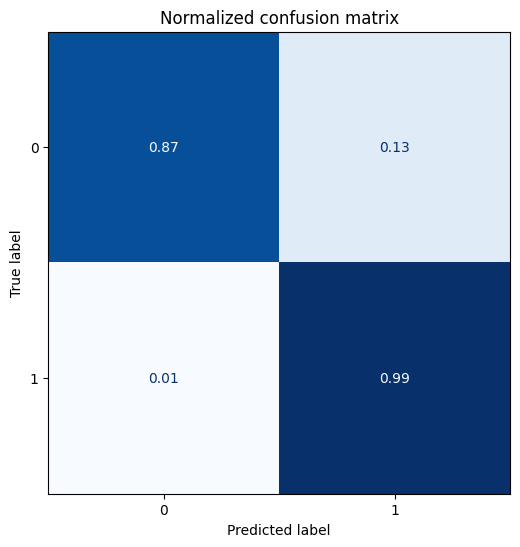

In [40]:
import numpy as np
import matplotlib.pyplot as plt
y_preds = np.argmax(pred.predictions, axis=1)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_valid = np.array(enc['Cardiology']['validation']['label'])
labels = enc['Cardiology']["train"].features["label"].names
plot_confusion_matrix(y_preds, y_valid, labels)
